In [1]:
import numpy as np
import matplotlib.pyplot as plt
from random import shuffle
from tqdm import tqdm_notebook
import pickle
import os
from pathlib import Path
import cv2
import timeit

In [2]:
train_dir = Path('./data/train')
test_dir = Path('./data/test1')

In [3]:
def label_img(img):
    """
    Parameters:
        img: image path
    Returns:
        0, 1 if dog or cat
    """
    if 'cat' in img:
        return [1, 0]
    elif 'dog' in img:
        return [0, 1]
    else:
        print('Error classifying img')

In [5]:
# using hyak so this will fit into memory 
def create_train_data():
    """
    Creates a numpy array of dim (25000, 227, 227, 3)
    Along with a numpy array of labels
    
    Parameters:
        batch_size = 5000
    Outputs:
    
    """
    data_labels = []
    for img in tqdm_notebook(os.listdir(train_dir)):
        c_path = train_dir / img
        c_label = label_img(img)
        c_data = cv2.resize(cv2.imread(str(c_path)), (227, 227))
        data_labels.append((c_data, c_label))
    shuffle(data_labels)
    return data_labels
    

## Load train

In [6]:
all_data = create_train_data()

In [8]:
# should have done this in previous cell, but this will work for now
img, labels = [], []
for i in range(len(all_data)):
    img.append(all_data[i][0])
    labels.append(all_data[i][1])
np_img = np.array(img)
np_labels = np.array(labels)

In [11]:
# save to 5 pkls
start_idx = 0
end_idx = 5000
for i in range(5):
    with open('dog_cat_training_' + str(i) + '.pkl', 'wb') as foo:
        temp_dict = {'data':np_img[start_idx:end_idx], 'labels':np_labels[start_idx:end_idx]}
        pickle.dump(temp_dict, foo)
    start_idx += 5000
    end_idx += 5000

## Pickle train, 5 by 5000

[0 1]


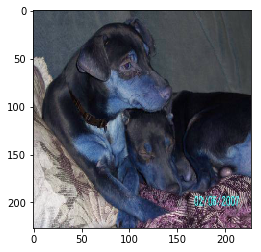

## Function to load test data

In [8]:
def create_test_data():
    test_data = []
    for img in tqdm_notebook(os.listdir(test_dir)):
        c_path = test_dir / img
        #c_label = label_img(img)
        c_data = cv2.resize(cv2.imread(str(c_path)), (227, 227))
        test_data.append(c_data)
    shuffle(test_data)
    return test_data

## Load Test Data

In [9]:
test_data = create_test_data()

## Pickle test data after validation split

In [14]:
# validation
with open('dog_cat_validation.pkl', 'wb') as val:
    pickle.dump(test_data[:500], val)
# test
with open('dog_cat_test.pkl', 'wb') as test:
    pickle.dump(test_data[500:], test)